In [1]:
# Generation of sample data

import numpy as np
np.random.seed(123)

def f(x):
    return np.cos(x)

n = 100

x_a = 0.5 + 0.3*np.random.randn(n) # data A
y_a = f(x_a) + 0.05*np.random.randn(n)

x_b = 1.0 + 0.3*np.random.randn(n) # data B
y_b = f(x_b) + 0.05*np.random.randn(n)

In [2]:
# Deinsity ratio estimation

from densratio import densratio

dr = densratio(x_b, x_a, alpha=0.1)
weight = dr.compute_density_ratio(x_a)

RuLSIF starting...
Searching for the optimal sigma and lambda...
sigma = 0.00100, lambda = 0.00100, score = 4.35690
sigma = 0.00100, lambda = 0.01000, score = -0.02199
sigma = 0.00100, lambda = 0.10000, score = -0.07674
sigma = 0.00100, lambda = 1.00000, score = -0.01028
sigma = 0.00100, lambda = 10.00000, score = -0.00106
sigma = 0.00100, lambda = 100.00000, score = -0.00011
sigma = 0.00100, lambda = 1000.00000, score = -0.00001
sigma = 0.00100, lambda = 10000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000.00000, score = -0.00000
sigma = 0.00100, lambda = 10000000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000000.00000, score = -0.00000
sigma = 0.01000, lambda = 0.00100, score = 4.31319
sigma = 0.01000, lambda = 0.01000, score = -0.19055
sigma = 0.01000, lambda = 0.10000, score = -0.48298
sigma = 0.01000, lambda = 1.00000, score = -0.09026
sigma = 

sigma = 100000000.00000, lambda = 0.00100, score = -0.49995
sigma = 100000000.00000, lambda = 0.01000, score = -0.49995
sigma = 100000000.00000, lambda = 0.10000, score = -0.49994
sigma = 100000000.00000, lambda = 1.00000, score = -0.49981
sigma = 100000000.00000, lambda = 10.00000, score = -0.49509
sigma = 100000000.00000, lambda = 100.00000, score = -0.37375
sigma = 100000000.00000, lambda = 1000.00000, score = -0.08670
sigma = 100000000.00000, lambda = 10000.00000, score = -0.00985
sigma = 100000000.00000, lambda = 100000.00000, score = -0.00100
sigma = 100000000.00000, lambda = 1000000.00000, score = -0.00010
sigma = 100000000.00000, lambda = 10000000.00000, score = -0.00001
sigma = 100000000.00000, lambda = 100000000.00000, score = -0.00000
sigma = 100000000.00000, lambda = 1000000000.00000, score = -0.00000
sigma = 1000000000.00000, lambda = 0.00100, score = -0.49995
sigma = 1000000000.00000, lambda = 0.01000, score = -0.49995
sigma = 1000000000.00000, lambda = 0.10000, score = -

In [3]:
# Regression (Covariate Shift Adaptation)

from sklearn.linear_model import LinearRegression

X_a = np.array([x_a]).T
reg = LinearRegression().fit(X_a, y_a, weight)

(0.0, 1.5)

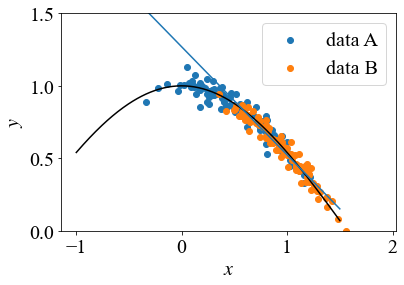

In [4]:
# Visualization

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 20  

plt.scatter(x_a, y_a, label='data A')
plt.scatter(x_b, y_b, label='data B')
xx = np.linspace(-1, 1.5, 300)
plt.plot(xx, f(xx), color='k')
plt.plot(xx, reg.coef_[0] * xx + reg.intercept_)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.ylim((0,1.5))